# Tissue models analysis

In [2]:
import os
import pandas as pd
from result_analysis import get_number_of_unique_reactions, get_number_of_reactions, \
   run_pca, run_tsne, plot_tsne
from sklearn.preprocessing import StandardScaler
from cobra.io import read_sbml_model

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
DATAPATH = 'C:/Users/BiSBII/Documents/plantdb/reconstruction_results/vvinif2023/results_troppo/RNAseq/'
MODELPATH = os.path.join(DATAPATH, 'reconstructed_models')

## Models default: 6, 8, 10

In [4]:
default_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_default.csv')

In [5]:
df_default = pd.read_csv(default_csv, index_col=0)
df_default = df_default.fillna('FALSE')

number_of_reacs, reactions_list = get_number_of_reactions(df_default)
number_of_reacs

,Number of reactions
berry_green_t6,2465
berry_green_t8,1176
berry_green_t10,639
stem_t6,2208
stem_t8,981
stem_t10,587
berry_mature_t6,2141
berry_mature_t8,1231
berry_mature_t10,663
leaf_t6,2299


In [8]:
reactions_t6 = {k: v for k,v in reactions_list.items() if k.endswith('_t6')}
reactions_t8 = {k: v for k,v in reactions_list.items() if k.endswith('_t8')}
reactions_t10 = {k: v for k,v in reactions_list.items() if k.endswith('_t10')}

number_of_uniques_t6 = get_number_of_unique_reactions(reactions_t6)
number_of_uniques_t6

,Unique reactions
berry_green_t6,169
stem_t6,169
berry_mature_t6,140
leaf_t6,392


In [9]:
number_of_uniques_t8 = get_number_of_unique_reactions(reactions_t8)
number_of_uniques_t8

,Unique reactions
berry_green_t8,95
stem_t8,88
berry_mature_t8,144
leaf_t8,210


In [10]:
number_of_uniques_t10 = get_number_of_unique_reactions(reactions_t10)
number_of_uniques_t10

,Unique reactions
berry_green_t10,25
stem_t10,15
berry_mature_t10,186
leaf_t10,161


### number of genes from models

In [11]:
models = ['leaf_t6_default_fastcore_0_3_4.xml', 'stem_t6_default_fastcore_0_3_4.xml', 'berry_green_t6_default_fastcore_0_3_4.xml', 'berry_mature_t6_default_fastcore_0_3_4.xml', 'leaf_t8_default_fastcore_0_3_4.xml', 'stem_t8_default_fastcore_0_3_4.xml', 'berry_green_t8_default_fastcore_0_3_4.xml', 'berry_mature_t8_default_fastcore_0_3_4.xml', 'leaf_t10_default_fastcore_0_3_4.xml', 'stem_t10_default_fastcore_0_3_4.xml', 'berry_green_t10_default_fastcore_0_3_4.xml', 'berry_mature_t10_default_fastcore_0_3_4.xml']

for modelname in models:
    model_obj = read_sbml_model(os.path.join(MODELPATH, modelname))
    all_genes = []
    for reac in model_obj.reactions:
        all_genes.extend([g.id for g in reac.genes])
        
    print(modelname, len(set(all_genes)))

leaf_t6_default_fastcore_0_3_4.xml 4670
stem_t6_default_fastcore_0_3_4.xml 4787
berry_green_t6_default_fastcore_0_3_4.xml 4942
berry_mature_t6_default_fastcore_0_3_4.xml 4446
leaf_t8_default_fastcore_0_3_4.xml 3008
stem_t8_default_fastcore_0_3_4.xml 2967
berry_green_t8_default_fastcore_0_3_4.xml 3035
berry_mature_t8_default_fastcore_0_3_4.xml 3127
leaf_t10_default_fastcore_0_3_4.xml 2105
stem_t10_default_fastcore_0_3_4.xml 1773
berry_green_t10_default_fastcore_0_3_4.xml 2089
berry_mature_t10_default_fastcore_0_3_4.xml 2140


## Models Global 50 and 75

In [12]:
global50_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_Global_0_2_4.csv')
global75_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_Global_0_3_4.csv')

In [13]:
df_global50 = pd.read_csv(global50_csv, index_col=0)
df_global50 = df_global50.fillna('FALSE')

df_global75 = pd.read_csv(global75_csv, index_col=0)
df_global75 = df_global75.fillna('FALSE')

number_of_reacs50, reactions_list50 = get_number_of_reactions(df_global50)
number_of_reacs50

,Number of reactions
berry_green_t0,4399
stem_t0,4433
berry_mature_t0,4250
leaf_t0,4460


In [14]:
number_of_reacs75, reactions_list75 = get_number_of_reactions(df_global75)
number_of_reacs75

,Number of reactions
berry_green_t0,4399
stem_t0,4433
berry_mature_t0,4250
leaf_t0,4460


In [16]:
number_of_uniques_50 = get_number_of_unique_reactions(reactions_list50)
number_of_uniques_50

,Unique reactions
berry_green_t0,8
stem_t0,89
berry_mature_t0,18
leaf_t0,59


In [15]:
number_of_uniques_75 = get_number_of_unique_reactions(reactions_list75)
number_of_uniques_75

,Unique reactions
berry_green_t0,8
stem_t0,89
berry_mature_t0,18
leaf_t0,59


In [17]:
models = ['leaf_t0_Global_fastcore_0_2_4.xml', 'stem_t0_Global_fastcore_0_2_4.xml', 'berry_mature_t0_Global_fastcore_0_2_4.xml', 
          'berry_green_t0_Global_fastcore_0_2_4.xml', 'leaf_t0_Global_fastcore_0_3_4.xml', 'stem_t0_Global_fastcore_0_3_4.xml', 
          'berry_mature_t0_Global_fastcore_0_3_4.xml', 'berry_green_t0_Global_fastcore_0_3_4.xml']

for modelname in models:
    model_obj = read_sbml_model(os.path.join(MODELPATH, modelname))
    all_genes = []
    for reac in model_obj.reactions:
        all_genes.extend([g.id for g in reac.genes])
        
    print(modelname, len(set(all_genes)))

leaf_t0_Global_fastcore_0_2_4.xml 6889
stem_t0_Global_fastcore_0_2_4.xml 6869
berry_mature_t0_Global_fastcore_0_2_4.xml 6640
berry_green_t0_Global_fastcore_0_2_4.xml 6861
leaf_t0_Global_fastcore_0_3_4.xml 6889
stem_t0_Global_fastcore_0_3_4.xml 6869
berry_mature_t0_Global_fastcore_0_3_4.xml 6640
berry_green_t0_Global_fastcore_0_3_4.xml 6861


## Local T1: 50_50, 50_75, 75_50, 75_75 

In [18]:
local1_50_50_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_Local1_0_2_2.csv')
local1_50_75_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_Local1_0_2_3.csv')
local1_75_50_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_Local1_0_3_2.csv')
local1_75_75_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_Local1_0_3_3.csv')

In [19]:
df_local1_50_50 = pd.read_csv(local1_50_50_csv, index_col=0)
df_local1_50_50 = df_local1_50_50.fillna('FALSE')

df_local1_50_75 = pd.read_csv(local1_50_75_csv, index_col=0)
df_local1_50_75 = df_local1_50_75.fillna('FALSE')

df_local1_75_50 = pd.read_csv(local1_75_50_csv, index_col=0)
df_local1_75_50 = df_local1_75_50.fillna('FALSE')

df_local1_75_75 = pd.read_csv(local1_75_75_csv, index_col=0)
df_local1_75_75 = df_local1_75_75.fillna('FALSE')

number_of_reacs_50_50, reactions_list_50_50 = get_number_of_reactions(df_local1_50_50)
number_of_reacs_50_50

,Number of reactions
berry_green_t0,4091
stem_t0,3417
berry_mature_t0,3286
leaf_t0,3600


In [20]:
number_of_reacs_50_75, reactions_list_50_75 = get_number_of_reactions(df_local1_50_75)
number_of_reacs_50_75

,Number of reactions
berry_green_t0,3000
stem_t0,2690
berry_mature_t0,2601
leaf_t0,3145


In [21]:
number_of_reacs_75_50, reactions_list_75_50 = get_number_of_reactions(df_local1_75_50)
number_of_reacs_75_50

,Number of reactions
berry_green_t0,4091
stem_t0,3417
berry_mature_t0,3286
leaf_t0,3600


In [21]:
number_of_reacs_75_75, reactions_list_75_75 = get_number_of_reactions(df_local1_75_75)
number_of_reacs_75_75

,Number of reactions
berry_green_t0,3121
stem_t0,2820
berry_mature_t0,2707
leaf_t0,3245


In [22]:
number_of_uniques_50_50 = get_number_of_unique_reactions(reactions_list_50_50)
number_of_uniques_50_50

,Unique reactions
berry_green_t0,12
stem_t0,94
berry_mature_t0,19
leaf_t0,60


In [23]:
number_of_uniques_50_75 = get_number_of_unique_reactions(reactions_list_50_75)
number_of_uniques_50_75

,Unique reactions
berry_green_t0,413
stem_t0,314
berry_mature_t0,273
leaf_t0,469


In [83]:
number_of_uniques_75_50 = get_number_of_unique_reactions(reactions_list_75_50)
number_of_uniques_75_50

,Unique reactions
berry_green_t0,12
stem_t0,95
berry_mature_t0,21
leaf_t0,54


In [84]:
number_of_uniques_75_75 = get_number_of_unique_reactions(reactions_list_75_75)
number_of_uniques_75_75

,Unique reactions
berry_green_t0,411
stem_t0,322
berry_mature_t0,279
leaf_t0,458


In [24]:
models = ['berry_mature_t0_Local1_fastcore_0_3_2.xml', 'berry_green_t0_Local1_fastcore_0_3_2.xml',
          'stem_t0_Local1_fastcore_0_3_2.xml', 'leaf_t0_Local1_fastcore_0_3_2.xml',
          'berry_mature_t0_Local1_fastcore_0_3_3.xml', 'berry_green_t0_Local1_fastcore_0_3_3.xml',
          'stem_t0_Local1_fastcore_0_3_3.xml', 'leaf_t0_Local1_fastcore_0_3_3.xml']

for modelname in models:
    model_obj = read_sbml_model(os.path.join(MODELPATH, modelname))
    all_genes = []
    for reac in model_obj.reactions:
        all_genes.extend([g.id for g in reac.genes])
        
    print(modelname, len(set(all_genes)))

berry_mature_t0_Local1_fastcore_0_3_2.xml 5882
berry_green_t0_Local1_fastcore_0_3_2.xml 6562
stem_t0_Local1_fastcore_0_3_2.xml 6324
leaf_t0_Local1_fastcore_0_3_2.xml 6309
berry_mature_t0_Local1_fastcore_0_3_3.xml 5151
berry_green_t0_Local1_fastcore_0_3_3.xml 5401
stem_t0_Local1_fastcore_0_3_3.xml 5636
leaf_t0_Local1_fastcore_0_3_3.xml 5771


## Local T2: 25_75_50, 25_75_75

In [25]:
local2_25_75_50_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_Local2_1_3_2.csv')
local2_25_75_75_csv = os.path.join(DATAPATH, 'berry_green_stem_berry_mature_leaf_fastcore_Local2_1_3_3.csv')

In [26]:
df_local2_25_75_50 = pd.read_csv(local2_25_75_50_csv, index_col=0)
df_local2_25_75_50 = df_local2_25_75_50.fillna('FALSE')

df_local2_25_75_75 = pd.read_csv(local2_25_75_75_csv, index_col=0)
df_local2_25_75_75 = df_local2_25_75_75.fillna('FALSE')

number_of_reacs_25_75_50, reactions_list_25_75_50 = get_number_of_reactions(df_local2_25_75_50)
number_of_reacs_25_75_50

,Number of reactions
berry_green_t0,4248
stem_t0,4137
berry_mature_t0,4025
leaf_t0,4263


In [27]:
number_of_reacs_25_75_75, reactions_list_25_75_75 = get_number_of_reactions(df_local2_25_75_75)
number_of_reacs_25_75_75

,Number of reactions
berry_green_t0,4364
stem_t0,4247
berry_mature_t0,4122
leaf_t0,4370


In [27]:
number_of_uniques_25_75_50 = get_number_of_unique_reactions(reactions_list_25_75_50)
number_of_uniques_25_75_50

,Unique reactions
berry_green_t0,26
stem_t0,97
berry_mature_t0,19
leaf_t0,124


In [91]:
number_of_uniques_25_75_75 = get_number_of_unique_reactions(reactions_list_25_75_75)
number_of_uniques_25_75_75

,Unique reactions
berry_green_t0,25
stem_t0,105
berry_mature_t0,27
leaf_t0,115


In [28]:
models = ['leaf_t0_Local2_fastcore_1_3_2.xml', 'stem_t0_Local2_fastcore_1_3_2.xml', 
          'berry_green_t0_Local2_fastcore_1_3_2.xml', 'berry_mature_t0_Local2_fastcore_1_3_2.xml', 
          'leaf_t0_Local2_fastcore_1_3_3.xml', 'stem_t0_Local2_fastcore_1_3_3.xml',
          'berry_green_t0_Local2_fastcore_1_3_3.xml', 'berry_mature_t0_Local2_fastcore_1_3_3.xml',
          ]

for modelname in models:
    model_obj = read_sbml_model(os.path.join(MODELPATH, modelname))
    all_genes = []
    for reac in model_obj.reactions:
        all_genes.extend([g.id for g in reac.genes])
        
    print(modelname, len(set(all_genes)))

leaf_t0_Local2_fastcore_1_3_2.xml 6701
stem_t0_Local2_fastcore_1_3_2.xml 6602
berry_green_t0_Local2_fastcore_1_3_2.xml 6657
berry_mature_t0_Local2_fastcore_1_3_2.xml 6312
leaf_t0_Local2_fastcore_1_3_3.xml 6701
stem_t0_Local2_fastcore_1_3_3.xml 6602
berry_green_t0_Local2_fastcore_1_3_3.xml 6657
berry_mature_t0_Local2_fastcore_1_3_3.xml 6312


# t-SNE sampling fluxes

In [29]:
SAMPLING = os.path.join(DATAPATH, 'dfa', 'flux_sampling_3000')
scaler = StandardScaler()

## default models

In [30]:
df_sampling_default_t6 = pd.read_csv(os.path.join(SAMPLING, 'default_t6_sampling_1000.csv'), index_col= 0)
df_sampling_default_t6.shape

(4000, 3444)

In [31]:
df_sampling_default_t6 = df_sampling_default_t6.loc[:, (df_sampling_default_t6 != 0).any()]

In [32]:
df_sampling_default_t6.shape

(4000, 2159)

In [33]:
sampling_default6_scaled = scaler.fit_transform(df_sampling_default_t6)
df_sampling_default_t6_scaled = pd.DataFrame(sampling_default6_scaled, columns=df_sampling_default_t6.columns,
                                             index=df_sampling_default_t6.index)

In [34]:
df_pca_sampling_default6, explained_variance_default6, _, _ = run_pca(n_components=3, data=df_sampling_default_t6_scaled)

In [35]:
explained_variance_default6

array([0.28325653, 0.13620713, 0.11227356])

In [36]:
df_tsne_sampling_default6 = run_tsne(n_components=2, data=df_pca_sampling_default6)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


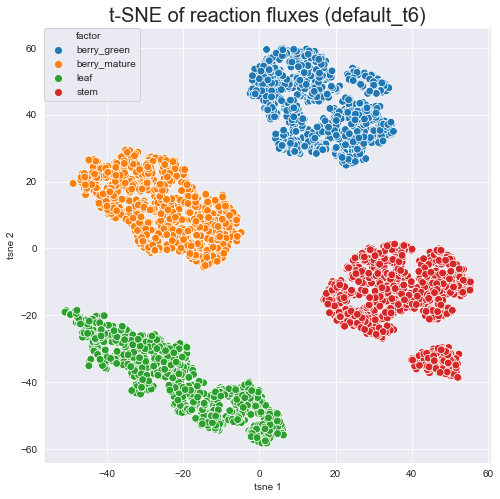

In [94]:
df_tsne_sampling_default6['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_default6, name_fig='tsne_fluxes_default_t6_1000x', title='t-SNE of reaction fluxes (default_t6)')

## global models

In [39]:
df_sampling_global_50 = pd.read_csv(os.path.join(SAMPLING, 'global_sampling_1000.csv'), index_col= 0)
df_sampling_global_50.shape

(4000, 4796)

In [40]:
df_sampling_global_50 = df_sampling_global_50.loc[:, (df_sampling_global_50 != 0).any()]
df_sampling_global_50.shape

(4000, 2636)

In [41]:
sampling_global_50_scaled = scaler.fit_transform(df_sampling_global_50)
df_sampling_global_50_scaled = pd.DataFrame(sampling_global_50_scaled, columns=df_sampling_global_50.columns,
                                             index=df_sampling_global_50.index)

In [42]:
df_pca_sampling_global_50, explained_variance_global_50, _, _ = run_pca(n_components=3, data=df_sampling_global_50_scaled)
explained_variance_global_50

array([0.15980624, 0.08810957, 0.07543464])

In [43]:
df_tsne_sampling_global_50 = run_tsne(n_components=2, data=df_pca_sampling_global_50)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


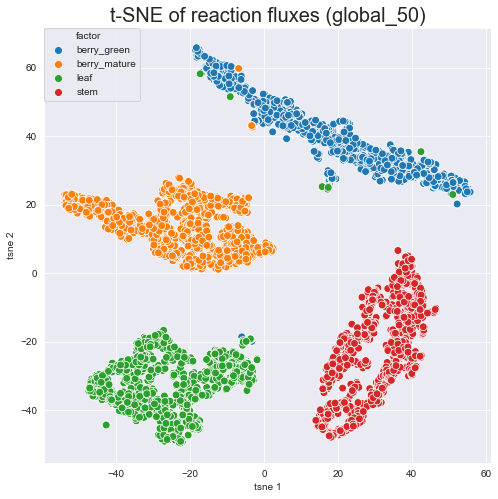

In [44]:
df_tsne_sampling_global_50['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_global_50, name_fig='tsne_fluxes_global_50_1000X', title='t-SNE of reaction fluxes (global_50)')

## local t1 models 50_50

In [45]:
df_sampling_local1_50_50 = pd.read_csv(os.path.join(SAMPLING, 'local1_50_sampling_1000.csv'), index_col= 0)
df_sampling_local1_50_50.shape

(4000, 4819)

In [46]:
df_sampling_local1_50_50 = df_sampling_local1_50_50.loc[:, (df_sampling_local1_50_50 != 0).any()]
df_sampling_local1_50_50.shape

(4000, 2559)

In [47]:
sampling_local1_50_50_scaled = scaler.fit_transform(df_sampling_local1_50_50)
df_sampling_local1_50_50_scaled = pd.DataFrame(sampling_local1_50_50_scaled, columns=df_sampling_local1_50_50.columns,
                                             index=df_sampling_local1_50_50.index)

In [48]:
df_pca_sampling_local1_50_50, explained_variance_local1_50_50, _, _ = run_pca(n_components=3, data=df_sampling_local1_50_50_scaled)
explained_variance_local1_50_50

array([0.25523285, 0.1324195 , 0.09697022])

In [49]:
df_tsne_sampling_local1_50_50 = run_tsne(n_components=2, data=df_pca_sampling_local1_50_50)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


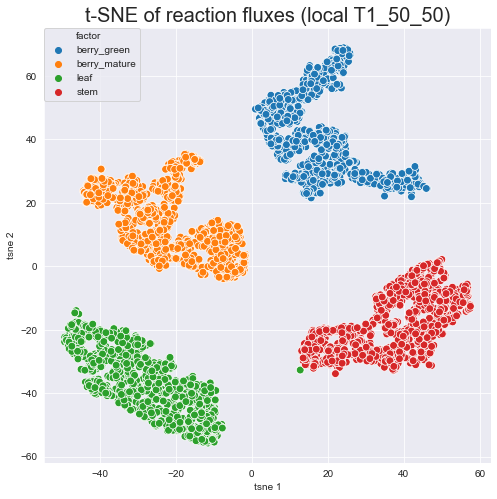

In [50]:
df_tsne_sampling_local1_50_50['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_local1_50_50, name_fig='tsne_fluxes_local1_50_50_1000x', title='t-SNE of reaction fluxes (local T1_50_50)')

## local t1 models 50_75

In [51]:
df_sampling_local1_50_75 = pd.read_csv(os.path.join(SAMPLING, 'local1_75_sampling_1000.csv'), index_col= 0)
df_sampling_local1_50_75.shape

(4000, 4851)

In [52]:
df_sampling_local1_50_75 = df_sampling_local1_50_75.loc[:, (df_sampling_local1_50_75 != 0).any()]
df_sampling_local1_50_75.shape

(4000, 2533)

In [53]:
sampling_local1_50_75_scaled = scaler.fit_transform(df_sampling_local1_50_75)
df_sampling_local1_50_75_scaled = pd.DataFrame(sampling_local1_50_75_scaled, columns=df_sampling_local1_50_75.columns,
                                             index=df_sampling_local1_50_75.index)

In [54]:
df_pca_sampling_local1_50_75, explained_variance_local1_50_75, _, _ = run_pca(n_components=3, data=df_sampling_local1_50_75_scaled)

In [55]:
df_tsne_sampling_local1_50_75 = run_tsne(n_components=2, data=df_pca_sampling_local1_50_75)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


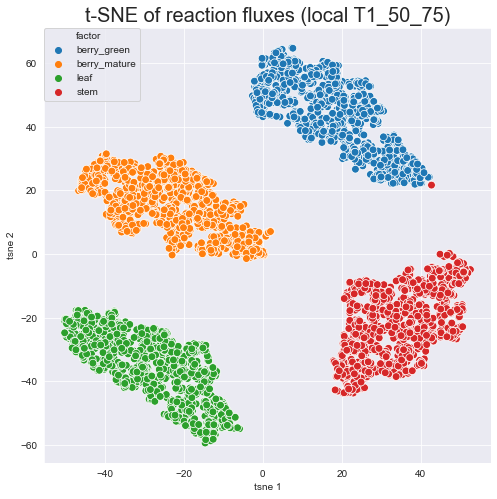

In [56]:
df_tsne_sampling_local1_50_75['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_local1_50_75, name_fig='tsne_fluxes_local1_50_75_1000x', title='t-SNE of reaction fluxes (local T1_50_75)')

## local t2 25_50_50

In [87]:
df_sampling_local2 = pd.read_csv(os.path.join(SAMPLING, 'local2_sampling_1000.csv'), index_col= 0)
df_sampling_local2.shape

(4000, 4703)

In [88]:
df_sampling_local2 = df_sampling_local2.loc[:, (df_sampling_local2 != 0).any()]
df_sampling_local2.shape

(4000, 2631)

In [89]:
sampling_local2_scaled = scaler.fit_transform(df_sampling_local2)
df_sampling_local2_scaled = pd.DataFrame(sampling_local2_scaled, columns=df_sampling_local2.columns,
                                             index=df_sampling_local2.index)

In [90]:
df_pca_sampling_local2, explained_variance_local2, _, _ = run_pca(n_components=3, data=df_sampling_local2_scaled)

In [91]:
explained_variance_local2

array([0.25208145, 0.11344365, 0.10625924])

In [92]:
df_tsne_sampling_local2 = run_tsne(n_components=2, data=df_pca_sampling_local2)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


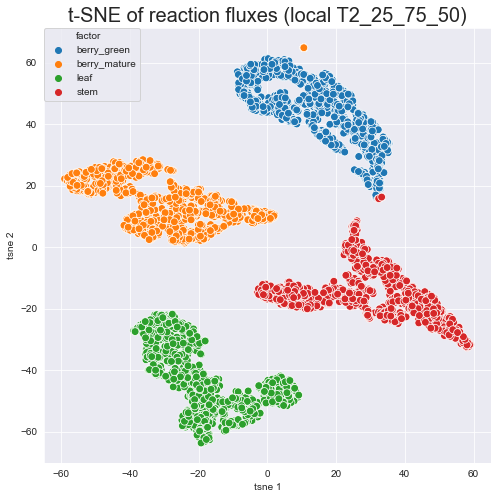

In [93]:
df_tsne_sampling_local2['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_local2, name_fig='tsne_fluxes_local2_1000x', title='t-SNE of reaction fluxes (local T2_25_75_50)')